In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
import transbigdata as tbd
import regex as re
import matplotlib.pyplot as plt

In [6]:
import fiona
fiona.drvsupport.supported_drivers['KML'] = 'rw'
route =  r'../data/external/Ligne-101.kml'
linegstop = gpd.GeoDataFrame.from_file(route,driver='KML')

In [7]:
line = linegstop.iloc[0:1].copy()
stops = linegstop.drop([0])

In [8]:
linegstop

,Name,Description,geometry
0,Ligne 101,,"LINESTRING (5.39210 36.18485, 5.39219 36.18577..."
1,GR,,POINT (5.39219 36.18562)
2,CFA01,,POINT (5.39505 36.18575)
3,CFA02,,POINT (5.39868 36.18521)
4,SAMU,,POINT (5.39862 36.18096)
5,MAHDI,,POINT (5.39999 36.17926)
6,1000 LOGTS,,POINT (5.40482 36.17858)
7,BIZARD,,POINT (5.40952 36.17914)
8,CENTRE,,POINT (5.40909 36.18044)
9,ASSURANCE,,POINT (5.40866 36.18274)


In [ ]:
line

,Name,Description,geometry
0,Ligne 101,,"LINESTRING (5.39210 36.18485, 5.39219 36.18577..."


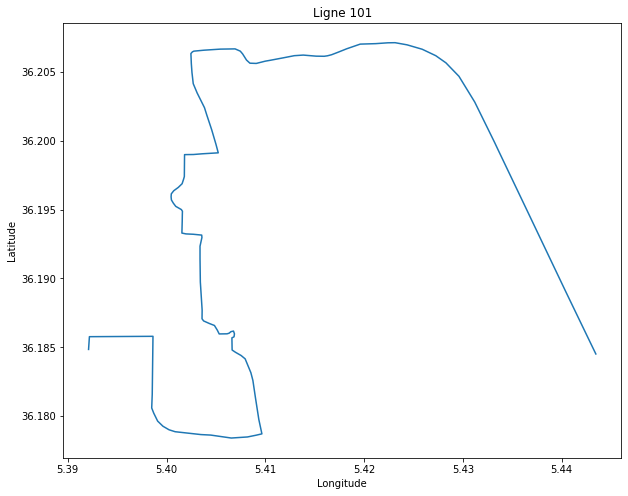

In [ ]:
# get the coordinates of the LineString geometry
coords = list(line['geometry'][0].coords)

# plot the LineString
fig, ax = plt.subplots(figsize=(10,8))
ax.plot([coord[0] for coord in coords], [coord[1] for coord in coords])

# set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Ligne 101')

# display the plot
plt.show()

In [ ]:
stops

,Name,Description,geometry
1,GR,,POINT (5.39219 36.18562)
2,CFA01,,POINT (5.39505 36.18575)
3,CFA02,,POINT (5.39868 36.18521)
4,SAMU,,POINT (5.39862 36.18096)
5,MAHDI,,POINT (5.39999 36.17926)
6,1000 LOGTS,,POINT (5.40482 36.17858)
7,BIZARD,,POINT (5.40952 36.17914)
8,CENTRE,,POINT (5.40909 36.18044)
9,ASSURANCE,,POINT (5.40866 36.18274)
10,SOUK,,POINT (5.40724 36.18455)


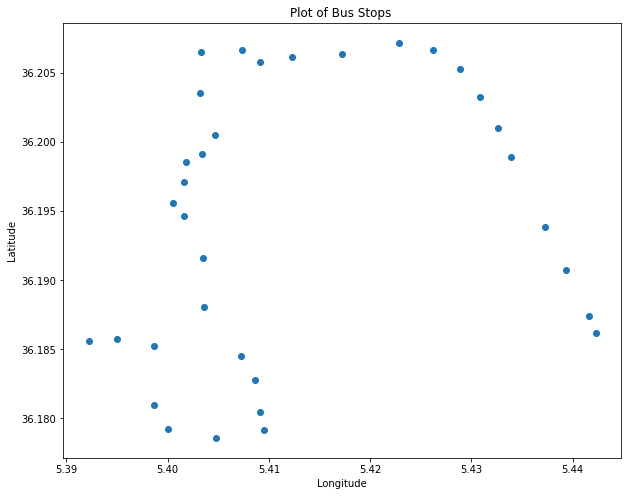

In [ ]:
# extract the coordinates of the Point geometries
x = [geom.x for geom in stops['geometry']]
y = [geom.y for geom in stops['geometry']]

# plot the points
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y)

# set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Plot of Bus Stops ')

# display the plot
plt.show()